In [8]:
# Initialize Otter
import otter
grader = otter.Notebook("HW4.ipynb")

# DATA 601: HW4

**Learning Objectives**

- Work with realworld datasets that can be represented using tabular data structures.
- Gain experience wrangling and organizing data using `pandas`.
- Produce visualizations summarizing information from tabular data.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,

_You do not need to submit the datasets provided for this homework._


## Dataset

In this homework, you will be working with a building utility usage dataset that contains usage data for six buildings at the University of Calgary over a period of three years. The data has been made available by the [Office of Sunstainability](https://www.ucalgary.ca/sustainability/campus-learning-lab) at the University of Calgary specifically for use in DATA 601. 

_Please do not share the data with anyone in any form_.

The original data is in excel format and contains a hierarchical index. For this assignment, you will be working with a slightly modified version where the building names have been anonymized and the hierarchical index has been flattended into a [tidy format](https://r4ds.had.co.nz/tidy-data.html). The resulting dataset is available on D2L in CSV format.

<!-- BEGIN QUESTION -->

## TASK 0

### Read the Dataset

- Please ensure that the data is available to you locally on the machine you are working on. 
- Read the data using `pandas`, display the head and tail of the data and familiarize yourself with the variables contained in the dataset. 

In [7]:
# Use this cell to collect package imports
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
...

Ellipsis

In [12]:
# Read the data into a pandas dataframe and display the head and tail
df = pd.read_csv('Building Data.csv')
print(df.head(5))
print(df.tail())
print(df.info())

         Date Building Chilled Water (kWh) Cooling (kWh)  \
0  2018-10-01       B1                 NaN      4,920.66   
1  2018-10-01       B2                 NaN      4,258.32   
2  2018-10-01       B3                   0           NaN   
3  2018-10-01       B4                   0           NaN   
4  2018-10-01       B5              383.92           NaN   

  Domestic Cold Water (m3) Electricity (kWh) Heating (kWh)  \
0                     6.39         13,240.10     16,244.46   
1                    89.69         13,846.41     50,505.60   
2                     70.1          7,181.70           NaN   
3                     38.1          9,500.00           NaN   
4                    25.18          2,038.85           NaN   

  Heating Water (kWh) Natural Gas (kWh)  
0                 NaN          1,319.45  
1                 NaN          2,427.78  
2           12,147.23                 0  
3            8,177.78                 0  
4            3,388.89                 0  
            Da

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 1

### Data Wrangling

At this stage, it might be helpful to do some data cleaning and wrangling to facilitate the tasks below. 

- Ensure that the numerical values are read in properly. If not, please use an appropiate numerical type to represent columns that contain numerical quantities.
- The `Date` column contains year, month and day information that needs to be parsed as such so that the data can be inspected at yearly, monthly and daily granularities. There are multiple ways of doing this; one way is to separate the year, month and day out into separate columns. You can also build a hierarchical row index with year, month and day as different levels of the index. 
 
 You may find [`pandas.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) helpful for this task.
 Please also have a look at the documentation for [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Some helpful type conversions and cleanup can be performed by pandas at the data read stage.

In [83]:
# Use this cell to do any data type conversions. Alternatively, you may want to pass in appropriate 
# arguments when reading in data above to ensure that the types are inferred correctly.

df = pd.read_csv('Building Data.csv', thousands=',')

# Ensure numerical values are read properly
numerical_columns = ['Chilled Water (kWh)', 'Cooling (kWh)', 'Domestic Cold Water (m3)', 'Electricity (kWh)', 'Heating (kWh)', 'Heating Water (kWh)', 'Natural Gas (kWh)']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)


In [84]:
# Use this cell to do any wrangling on the date column. Then display the resulting dataframe

df['Date'] = pd.to_datetime(df['Date'])

print(df.head(5))
print(df.tail())
print(df.dtypes)


        Date Building  Chilled Water (kWh)  Cooling (kWh)  \
0 2018-10-01       B1                  NaN        4920.66   
1 2018-10-01       B2                  NaN        4258.32   
2 2018-10-01       B3                 0.00            NaN   
3 2018-10-01       B4                 0.00            NaN   
4 2018-10-01       B5               383.92            NaN   

   Domestic Cold Water (m3)  Electricity (kWh)  Heating (kWh)  \
0                      6.39           13240.10       16244.46   
1                     89.69           13846.41       50505.60   
2                     70.10            7181.70            NaN   
3                     38.10            9500.00            NaN   
4                     25.18            2038.85            NaN   

   Heating Water (kWh)  Natural Gas (kWh)  
0                  NaN            1319.45  
1                  NaN            2427.78  
2             12147.23               0.00  
3              8177.78               0.00  
4              3388.89

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 2

### Exploring the Data for 2019

For this task, you will be working with usage data for the year 2019. For the year 2019, manipulate your dataframe to extract and visualize the following information:
1. Electricity usage per building for the entire year.
2. Total energy usage per building for the entire year. To determine total energy usage, add the variables that are in `kWh` units.
3. Box plots showing the daily energy usage (aggregated over the buildings) per month. As in the previous task, add the variables that are in `kWh` units to determine daily totals. 

For the tasks above where the type visualization is not clearly spelled out,  please choose an appropriate visualization that clearly shows the requested information. Please also ensure that you provide appropriate labels/legends/colorbars so that your visualizations are readable and self-contained.

Building
B1    4178192.04
B2    9172640.37
B3    1669895.96
B4    2668782.35
B5     671564.38
B6    1277728.52
Name: Electricity (kWh), dtype: float64


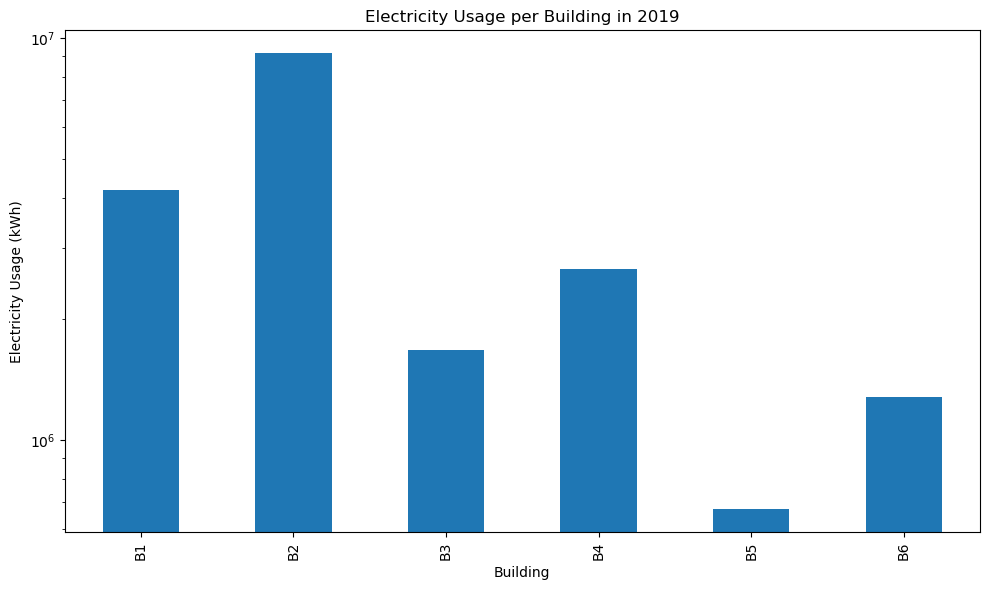

In [47]:
# Solution for 1.

df_2019 = df[df['Date'].dt.year == 2019]
electricity_usage_per_building = df_2019.groupby('Building')['Electricity (kWh)'].sum()
print(electricity_usage_per_building)

# Plot 
plt.figure(figsize=(10, 6))
electricity_usage_per_building.plot(kind='bar')
plt.yscale('log')  
plt.title('Electricity Usage per Building in 2019')
plt.xlabel('Building')
plt.ylabel('Electricity Usage (kWh)')
plt.tight_layout()
plt.show()


Building
B1    11219206.15
B2    20218399.92
B3     6198993.32
B4     5751404.75
B5     1681844.76
B6     6511199.51
Name: Total Energy Usage (kWh), dtype: float64


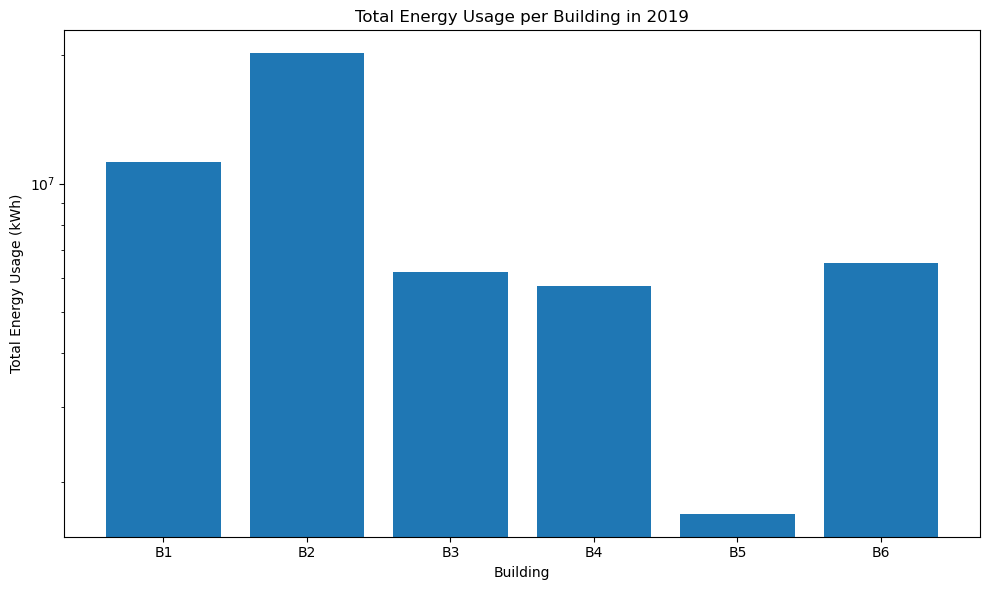

In [52]:
# Solution for 2.

df_2019 = df[df['Date'].dt.year == 2019].copy()
energy_columns = ['Electricity (kWh)', 'Chilled Water (kWh)', 'Cooling (kWh)', 'Heating (kWh)', 'Heating Water (kWh)', 'Natural Gas (kWh)']
df_2019.loc[:, 'Total Energy Usage (kWh)'] = df_2019[energy_columns].sum(axis=1)
total_energy_per_building = df_2019.groupby('Building')['Total Energy Usage (kWh)'].sum()
print(total_energy_per_building)

plt.figure(figsize=(10, 6))
plt.bar(total_energy_per_building.index, total_energy_per_building.values)
plt.yscale('log')  
plt.title('Total Energy Usage per Building in 2019')
plt.xlabel('Building')
plt.ylabel('Total Energy Usage (kWh)')
plt.tight_layout()
plt.show()


         Chilled Water (kWh)  Cooling (kWh)  Electricity (kWh)  Heating (kWh)  \
Date                                                                            
2019-01             13704.00      236496.62         1351868.26     1725898.61   
2019-02              6301.04      133019.11         1293780.68     2345676.86   
2019-03             18662.77      156921.98         1629134.43     1936151.54   
2019-04             25441.48      160638.16         1713948.16     1348928.84   
2019-05             94213.59      371482.21         1608026.66     1082381.38   
2019-06            503679.30      521100.84         1535199.55      671279.71   
2019-07            674599.88      577544.95         1635434.07      306516.90   
2019-08            728958.88      600497.74         1691386.23      347444.75   
2019-09            293901.57      438036.49         1712107.34      425944.76   
2019-10             33902.49      282077.96         1850516.81      556536.52   
2019-11             22480.01

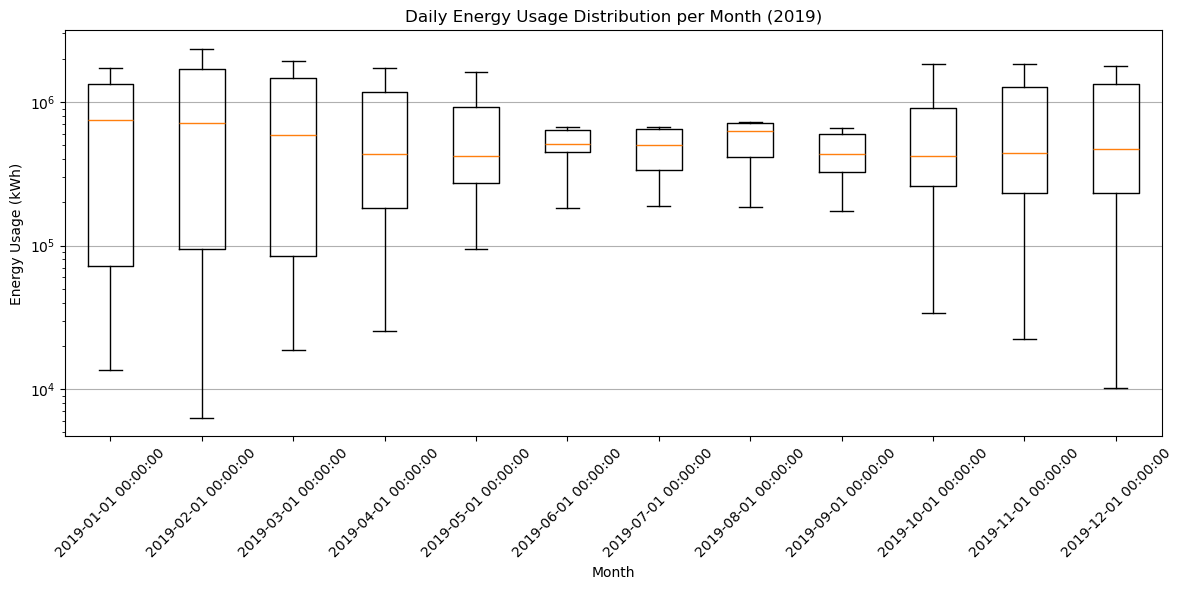

In [64]:
# Solution for 3.
numerical_columns = ['Chilled Water (kWh)', 'Cooling (kWh)', 'Electricity (kWh)', 'Heating (kWh)', 'Heating Water (kWh)', 'Natural Gas (kWh)']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)
daily_energy_per_month = df_2019.groupby(df_2019['Date'].dt.to_period('M'))[numerical_columns].sum()
print(daily_energy_per_month)


plt.figure(figsize=(12, 6))
plt.boxplot(daily_energy_per_month.values.T, labels=daily_energy_per_month.index.to_timestamp(), showfliers=False)
plt.yscale('log')  
plt.title('Daily Energy Usage Distribution per Month (2019)')
plt.xlabel('Month')
plt.ylabel('Energy Usage (kWh)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 3

### Effect of the COVID-19 pandemic

After Mar. 11, 2020, due to the COVID-19 pandemic, many employees and students affiliated with the University worked from home. *How did the COVID-19 pandemic affect building utility usage?*

Produce charts and visualizations that answer the above guiding question. What data wrangling you do and what visualizations you produce is up to you. However, please ensure that your visualizations effectively answer the guiding question. Please explain your data wrangling strategy, justify the choice of charts/visualizations, and use your charts/visualizations to explain your findings.


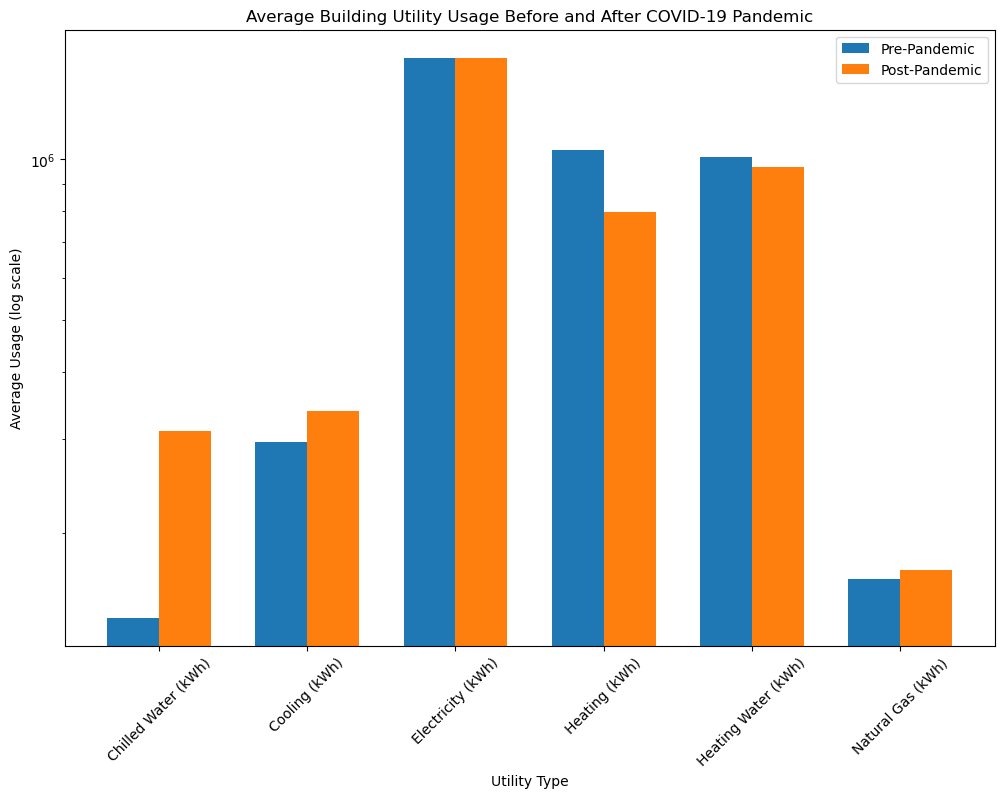

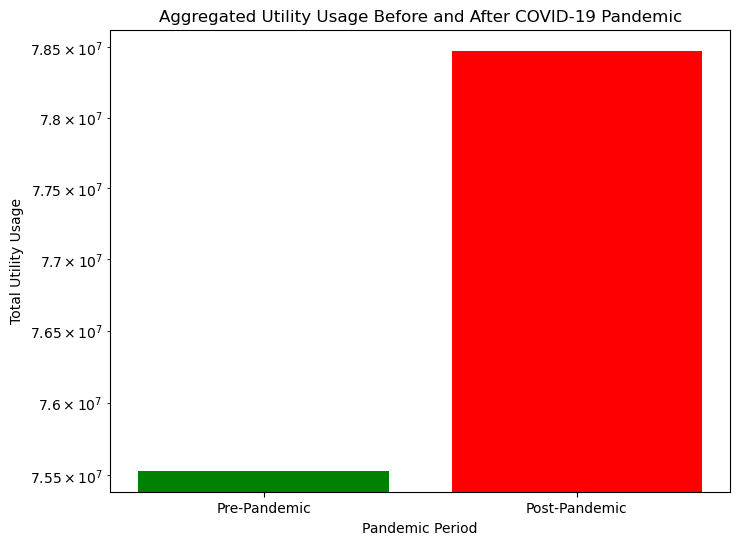

In [81]:
# Solution for 3.

df = pd.read_csv('Building Data.csv', thousands=',')
numerical_columns = ['Chilled Water (kWh)', 'Cooling (kWh)', 'Electricity (kWh)', 'Heating (kWh)', 'Heating Water (kWh)', 'Natural Gas (kWh)']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)

df['Date'] = pd.to_datetime(df['Date'])
pre_pandemic_data = df[df['Date'] < '2020-03-11']
post_pandemic_data = df[df['Date'] >= '2020-03-11']


pre_pandemic_aggregated = pre_pandemic_data.groupby(pd.Grouper(key='Date', freq='M'))[numerical_columns].sum()
post_pandemic_aggregated = post_pandemic_data.groupby(pd.Grouper(key='Date', freq='M'))[numerical_columns].sum()


avg_pre_pandemic = pre_pandemic_aggregated.mean()
avg_post_pandemic = post_pandemic_aggregated.mean()


plt.figure(figsize=(12, 8))
ax = plt.subplot()
bar_width = 0.35
index = range(len(numerical_columns))
pre_bars = ax.bar([i - bar_width/2 for i in index], avg_pre_pandemic, bar_width, label='Pre-Pandemic')
post_bars = ax.bar([i + bar_width/2 for i in index], avg_post_pandemic, bar_width, label='Post-Pandemic')
ax.set_yscale('log')
ax.set_xticks(index)
ax.set_xticklabels(numerical_columns, rotation=45)
ax.set_xlabel('Utility Type')
ax.set_ylabel('Average Usage (log scale)')
ax.set_title('Average Building Utility Usage Before and After COVID-19 Pandemic')
ax.legend()

pre_pandemic_data = df[df['Date'] < '2020-03-11']
post_pandemic_data = df[df['Date'] >= '2020-03-11']

pre_pandemic_aggregated = pre_pandemic_data[numerical_columns].sum().sum() 
post_pandemic_aggregated = post_pandemic_data[numerical_columns].sum().sum()  

df['Date'] = pd.to_datetime(df['Date'])

pre_pandemic_data = df[df['Date'] < '2020-03-11']
post_pandemic_data = df[df['Date'] >= '2020-03-11']

pre_pandemic_aggregated = pre_pandemic_data[numerical_columns].sum().sum()  
post_pandemic_aggregated = post_pandemic_data[numerical_columns].sum().sum()  

plt.figure(figsize=(8, 6))
plt.bar(['Pre-Pandemic', 'Post-Pandemic'], [pre_pandemic_aggregated, post_pandemic_aggregated], color=['green', 'red'])
plt.yscale('log') 
plt.title('Aggregated Utility Usage Before and After COVID-19 Pandemic')
plt.xlabel('Pandemic Period')
plt.ylabel('Total Utility Usage')
plt.grid(axis='y')
plt.show()

_Type your answer here, replacing this text._ The data wrangling process involved utilizing the cleaned dataset, which addressed missing values and data type conversions as described above. For this specific analysis, the dataset was filtered to segregate the data into two distinct periods: pre-pandemic and post-pandemic, marked by the onset of the COVID-19 pandemic on March 11, 2020.
In generating the "Average Building Utility Usage Before and After COVID-19 Pandemic" plot, the utility usage data was aggregated on a monthly basis. The average utility usage for both the pre-pandemic and post-pandemic periods was calculated by taking the mean of the aggregated data. The resulting averages were then plotted, with the y-axis scaled logarithmically to enhance visualization.
Subsequently, for the "Aggregated Utility Usage Before and After COVID-19 Pandemic" chart, all utility data was aggregated, maintaining the separation between pre-pandemic and post-pandemic periods. Recognizing the potential ambiguity in interpreting the overall impact from the first plot, this chart aimed to provide a clearer comparison by aggregating the data and presenting it side by side. Notably, only utilities measured in kWh were included in this analysis, excluding Domestic Cold Water measured in m3 for simplicity and clarity.
In conclusion, the visualization demonstrates a noticeable increase in overall utility usage post-pandemic compared to the pre-pandemic period, offering valuable insights into the impact of COVID-19 on building utility consumption.


<!-- END QUESTION -->

